In [1]:
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
from fastf1.core import Laps
from datetime import datetime
from matplotlib.collections import LineCollection
import matplotlib as mpl
from fastf1 import utils
import mplcyberpunk

In [2]:
ff1.plotting.setup_mpl()

In [3]:
year=int(input('Enter Year'))
gp=input('Enter the Grand Prix Location')
sessiontypechoice=int(input('Enter 1 for qualifying or 2 for race'))
if sessiontypechoice == 1:
    sessiontype='Q'
elif sessiontypechoice == 2:
    sessiontype='R'
else:
    print("Unknown choice")

In [4]:
session = ff1.get_session(year, gp,sessiontype)
session.load()

api         WARNING 	

NO CACHE! Api caching has not been enabled! 
	It is highly recommended to enable this feature for much faster data loading!
	Use `fastf1.Cache.enable_cache('path/to/cache/')`

core           INFO 	Loading data for Azerbaijan Grand Prix - Race [v2.2.8]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching car data...
api            INFO 	Parsing car data...
api            INFO 	Fetching position data...
api            INFO 	Parsing position data...
api            INFO 	Fetching weather data...
api            INFO 	Fetching race control messages...
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '63', '44', '10', '5', '14', '3', '4', '31'

In [5]:
if sessiontype=="Q":
    choicedrivers=int(input("Enter 1 for the comparision between top 2 drivers \n Enter 2 for the comparision between 2 specified drivers"))
    if choicedrivers==1: 
        quali_results=session.results
        quali_results=quali_results[['DriverNumber','BroadcastName','Abbreviation','TeamName','Position','Q1','Q2','Q3']]
        quali_results[['Abbreviation']]
        x=quali_results['Abbreviation'].iloc[0]
        y=quali_results['Abbreviation'].iloc[1]
        driver1=x
        driver2=y

    else:
        driver1=input("Enter the first driver initials")
        driver2=input("Enter the second driver initials")
else:
    driver1=input("Enter the first driver initials")
    driver2=input("Enter the second driver initials")


In [6]:
# if choicedrivers==1: 
#     quali_results=session.results
#     quali_results=quali_results[['DriverNumber','BroadcastName','Abbreviation','TeamName','Position','Q1','Q2','Q3']]
#     quali_results[['Abbreviation']]
#     x=quali_results['Abbreviation'].iloc[0]
#     y=quali_results['Abbreviation'].iloc[1]
#     driver1=x
#     driver2=y

# else:
#     driver1=input("Enter the first driver initials")
#     driver2=input("Enter the second driver initials")


In [7]:
driver1=driver1.upper()
driver2=driver2.upper()

In [8]:
session.results

,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
1,1,M VERSTAPPEN,VER,Red Bull Racing,1e5bc6,Max,Verstappen,Max Verstappen,1.0,3.0,NaT,NaT,NaT,0 days 01:34:05.941000,Finished,25.0
11,11,S PEREZ,PER,Red Bull Racing,1e5bc6,Sergio,Perez,Sergio Perez,2.0,2.0,NaT,NaT,NaT,0 days 01:34:26.764000,Finished,19.0
63,63,G RUSSELL,RUS,Mercedes,6cd3bf,George,Russell,George Russell,3.0,5.0,NaT,NaT,NaT,0 days 01:34:51.936000,Finished,15.0
44,44,L HAMILTON,HAM,Mercedes,6cd3bf,Lewis,Hamilton,Lewis Hamilton,4.0,7.0,NaT,NaT,NaT,0 days 01:35:17.620000,Finished,12.0
10,10,P GASLY,GAS,AlphaTauri,4e7c9b,Pierre,Gasly,Pierre Gasly,5.0,6.0,NaT,NaT,NaT,0 days 01:35:23.240000,Finished,10.0
5,5,S VETTEL,VET,Aston Martin,2d826d,Sebastian,Vettel,Sebastian Vettel,6.0,9.0,NaT,NaT,NaT,0 days 01:35:30.040000,Finished,8.0
14,14,F ALONSO,ALO,Alpine,2293d1,Fernando,Alonso,Fernando Alonso,7.0,10.0,NaT,NaT,NaT,0 days 01:35:34.537000,Finished,6.0
3,3,D RICCIARDO,RIC,McLaren,f58020,Daniel,Ricciardo,Daniel Ricciardo,8.0,12.0,NaT,NaT,NaT,0 days 01:35:38.148000,Finished,4.0
4,4,L NORRIS,NOR,McLaren,f58020,Lando,Norris,Lando Norris,9.0,11.0,NaT,NaT,NaT,0 days 01:35:38.497000,Finished,2.0
31,31,E OCON,OCO,Alpine,2293d1,Esteban,Ocon,Esteban Ocon,10.0,13.0,NaT,NaT,NaT,0 days 01:35:54.125000,Finished,1.0


In [9]:
laps=session.load_laps(with_telemetry=True)

laps_1=laps.pick_driver(driver1)
laps_2=laps.pick_driver(driver2)
if sessiontype == "Q":
    s1=laps_1.pick_fastest()
    s2=laps_2.pick_fastest()
    if s1.LapTime < s2.LapTime:
        fastest_1=s1
        fastest_2=s2
    else:
        fastest_1=s2
        fastest_2=s1
else:
    fastest_1=laps_1.pick_fastest()
    fastest_2=laps_2.pick_fastest()
    

c:\Users\Rajup\AppData\Local\Programs\Python\Python310\lib\site-packages\fastf1\core.py:1127: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Azerbaijan Grand Prix - Race [v2.2.8]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching car data...
api            INFO 	Parsing car data...
api            INFO 	Fetching position data...
api            INFO 	Parsing position data...
api            INFO 	Fetching weather data...
api            INFO 	Fetching race control messages...
core           INFO 	Finished loading 

In [10]:
print(fastest_1.LapTime)
print(fastest_2.LapTime)

0 days 00:01:46.050000
0 days 00:01:46.046000


In [11]:
total_race1=laps_1.get_car_data().add_distance()
total_race2=laps_2.get_car_data().add_distance()

In [12]:
driver1_telemetry=fastest_1.get_car_data().add_distance()
driver2_telemetry=fastest_2.get_car_data().add_distance()

In [13]:
fastest_2

Time                      0 days 02:10:32.644000
DriverNumber                                  11
LapTime                   0 days 00:01:46.046000
LapNumber                                     36
Stint                                          3
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:37.872000
Sector2Time               0 days 00:00:42.848000
Sector3Time               0 days 00:00:25.326000
Sector1SessionTime        0 days 02:09:24.470000
Sector2SessionTime        0 days 02:10:07.318000
Sector3SessionTime        0 days 02:10:32.644000
SpeedI1                                    212.0
SpeedI2                                    220.0
SpeedFL                                    317.0
SpeedST                                    320.0
IsPersonalBest                              True
Compound                                    HARD
TyreLife                                     3.0
FreshTyre           

In [14]:
driver1_color=plotting.team_color(fastest_1['Team'])
driver2_color=plotting.team_color(fastest_2['Team'])

    # handling case if both the drievrs are from the same team
if(driver1_color==driver2_color):
    driver2_color='#FFFFFF'

In [15]:
fastest_1

Time                      0 days 02:35:14.954000
DriverNumber                                   1
LapTime                   0 days 00:01:46.050000
LapNumber                                     50
Stint                                          3
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:37.846000
Sector2Time               0 days 00:00:42.964000
Sector3Time               0 days 00:00:25.240000
Sector1SessionTime        0 days 02:34:06.750000
Sector2SessionTime        0 days 02:34:49.714000
Sector3SessionTime        0 days 02:35:14.954000
SpeedI1                                    205.0
SpeedI2                                    219.0
SpeedFL                                    325.0
SpeedST                                    321.0
IsPersonalBest                              True
Compound                                    HARD
TyreLife                                    17.0
FreshTyre           

In [16]:
driver2

'PER'

In [17]:

#quali_results

In [18]:
#delta_ms=round(delta.total_seconds()*1000)
nameevent=session.event['OfficialEventName']

In [19]:
nameevent

'FORMULA 1 AZERBAIJAN GRAND PRIX 2022'

In [20]:
driver1_telemetry

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,Distance
0,2022-06-12 12:34:29.344,11307,319,8,100,False,0,car,0 days 00:00:00.432000,0 days 02:33:29.336000,38.280000
1,2022-06-12 12:34:29.624,11230,318,8,100,False,0,car,0 days 00:00:00.712000,0 days 02:33:29.616000,63.013333
2,2022-06-12 12:34:29.824,11255,317,8,100,False,0,car,0 days 00:00:00.912000,0 days 02:33:29.816000,80.624444
3,2022-06-12 12:34:30.063,11211,316,8,100,False,0,car,0 days 00:00:01.151000,0 days 02:33:30.055000,101.603333
4,2022-06-12 12:34:30.383,10923,314,8,9,False,0,car,0 days 00:00:01.471000,0 days 02:33:30.375000,129.514444
...,...,...,...,...,...,...,...,...,...,...,...
401,2022-06-12 12:36:13.824,11446,324,8,100,False,0,car,0 days 00:01:44.912000,0 days 02:35:13.816000,5819.893611
402,2022-06-12 12:36:13.984,11506,324,8,100,False,0,car,0 days 00:01:45.072000,0 days 02:35:13.976000,5834.293611
403,2022-06-12 12:36:14.384,11529,324,8,100,False,0,car,0 days 00:01:45.472000,0 days 02:35:14.376000,5870.293611
404,2022-06-12 12:36:14.584,11450,324,8,100,False,0,car,0 days 00:01:45.672000,0 days 02:35:14.576000,5888.293611


In [21]:
utils.delta_time(fastest_1, fastest_2)
delta_time, ref_tel, compare_tel = utils.delta_time(fastest_1, fastest_2)

In [55]:
path="D:/Python Projects/f1analysis/Visualisations/"

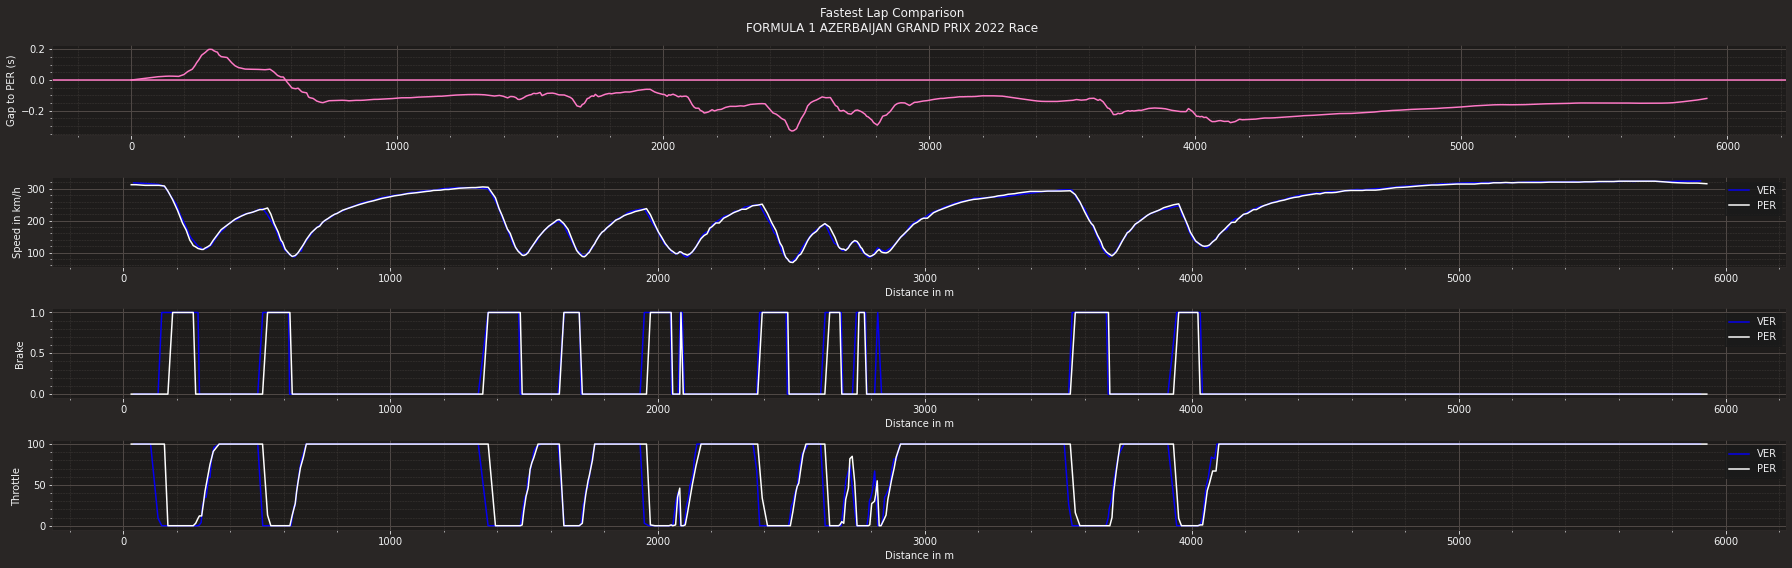

In [22]:
fig, ax = plt.subplots(4)
ax[0].plot(ref_tel['Distance'], delta_time)
ax[0].axhline(0)
ax[0].set(ylabel=f"Gap to {fastest_2.Driver} (s)")

ax[1].plot(driver1_telemetry['Distance'], driver1_telemetry['Speed'], color=driver1_color, label=driver1)
ax[1].plot(driver2_telemetry['Distance'], driver2_telemetry['Speed'], color=driver2_color, label=driver2)

ax[1].set_xlabel('Distance in m')
ax[1].set_ylabel('Speed in km/h')

ax[1].legend()

ax[2].plot(driver1_telemetry['Distance'], driver1_telemetry['Brake'], color=driver1_color, label=driver1)
ax[2].plot(driver2_telemetry['Distance'], driver2_telemetry['Brake'], color=driver2_color, label=driver2)

ax[2].set_xlabel('Distance in m')
ax[2].set_ylabel('Brake ')

ax[2].legend()

ax[3].plot(driver1_telemetry['Distance'], driver1_telemetry['Throttle'], color=driver1_color, label=driver1)
ax[3].plot(driver2_telemetry['Distance'], driver2_telemetry['Throttle'], color=driver2_color, label=driver2)

ax[3].set_xlabel('Distance in m')
ax[3].set_ylabel('Throttle ')

ax[3].legend()

plt.suptitle(f"Fastest Lap Comparison  \n"
             f"{nameevent} {session.name}  ")
fig.set_size_inches(25, 8)
plt.savefig(path+nameevent +' '+session.name+'telecomparision.jpg')
plt.tight_layout()
plt.show()

In [23]:
fastest_2.Sector1Time

Timedelta('0 days 00:00:37.872000')

In [24]:
x=fastest_1.telemetry['X']
y=fastest_1.telemetry['Y']
colormap = mpl.cm.plasma
color = fastest_1.telemetry['Speed'] 

In [25]:
telemetrydf=pd.DataFrame(fastest_1.telemetry)

In [26]:

chunksize =  int(telemetrydf.shape[0] / 3)

chunks = [telemetrydf[i:i+chunksize] for i in range(0,telemetrydf.shape[0],chunksize)]

In [27]:
chunks[0]['X']

2      1065
3      1203
4      1367
5      1421
6      1547
       ... 
268   -5628
269   -5681
270   -5804
271   -5847
272   -5986
Name: X, Length: 271, dtype: int64

In [28]:
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

In [29]:
points

array([[[1065, -590]],

       [[1203, -534]],

       [[1367, -466]],

       ...,

       [[ 917, -652]],

       [[ 997, -619]],

       [[1073, -586]]], dtype=int64)

In [30]:
one=fastest_1.LapTime
two=fastest_2.LapTime
if one<two:
    min=one
    max=two
else:
    min=two
    max=one
delta=max-min

deltams=round(delta.total_seconds()*1000)

In [31]:
#conversion of microseconds and seconds
ms=int(delta.microseconds)
gap=ms/1000000
print(gap)
seconds=delta.seconds
seconds + gap

gap = seconds + gap

0.004


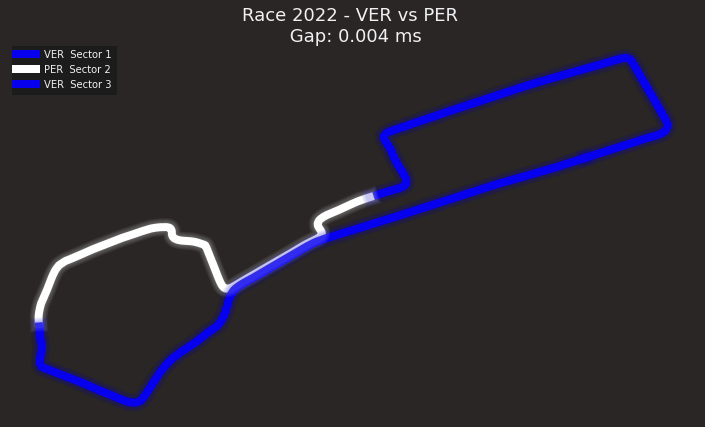

In [49]:
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
fig.suptitle(f'{session.name} {year} - {fastest_1.Driver} vs {fastest_2.Driver} \n Gap: {gap} ms', size=18, y=0.97)

# Adjust margins and turn of axis
#fastest1 alo fastest2 sai
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

# coloring of sector according to the fastest times  
if fastest_1.Sector1Time<fastest_2.Sector1Time:
    ax.plot(chunks[0]['X'], chunks[0]['Y'], color=driver1_color, linestyle='-', label=driver1+"  Sector 1", linewidth=8, zorder=0)
else:
    ax.plot(chunks[0]['X'], chunks[0]['Y'], color=driver2_color, linestyle='-',label=driver2+"  Sector 1", linewidth=8, zorder=0)
if fastest_1.Sector2Time<fastest_2.Sector2Time:
    ax.plot(chunks[1]['X'], chunks[1]['Y'], color=driver1_color, linestyle='-', label=driver1+"  Sector 2",linewidth=8, zorder=0)
else:
    ax.plot(chunks[1]['X'], chunks[1]['Y'], color=driver2_color, linestyle='-', label=driver2+"  Sector 2",linewidth=8, zorder=0)
if fastest_1.Sector3Time<fastest_2.Sector3Time:
    ax.plot(chunks[2]['X'], chunks[2]['Y'], color=driver1_color, linestyle='-',label=driver1+"  Sector 3", linewidth=8, zorder=0)
else:
    ax.plot(chunks[2]['X'], chunks[2]['Y'], color=driver2_color, linestyle='-',label=driver2+"  Sector 3    ", linewidth=8, zorder=0)

ax.legend()
mplcyberpunk.make_lines_glow()
plt.savefig(path+nameevent +' '+session.name+'sectorcompparision.jpg')
plt.show()

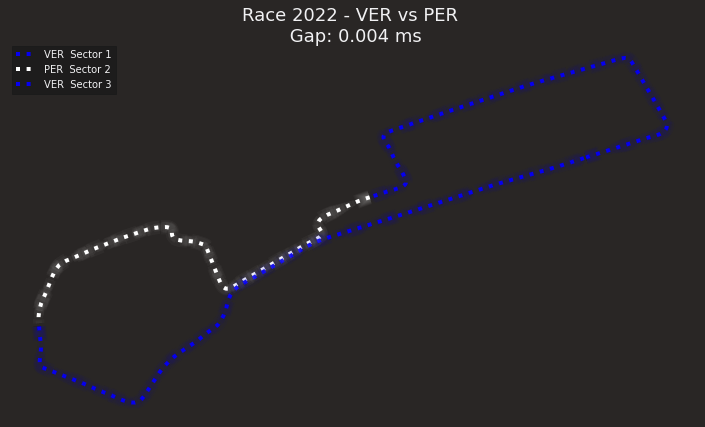

In [54]:

fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))

fig.suptitle(f'{session.name} {year} - {fastest_1.Driver} vs {fastest_2.Driver} \n Gap: {gap} ms', size=18, y=0.97)


# Adjust margins and turn of axis
#fastest1 alo fastest2 sai
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

# coloring of sector according to the fastest times  
if fastest_1.Sector1Time<fastest_2.Sector1Time:
    ax.plot(chunks[0]['X'], chunks[0]['Y'], color=driver1_color, linestyle=':', label=driver1+"  Sector 1", linewidth=4, zorder=0)
else:
    ax.plot(chunks[0]['X'], chunks[0]['Y'], color=driver2_color, linestyle=':',label=driver2+"  Sector 1", linewidth=4, zorder=0)
if fastest_1.Sector2Time<fastest_2.Sector2Time:
    ax.plot(chunks[1]['X'], chunks[1]['Y'], color=driver1_color, linestyle=':', label=driver1+"  Sector 2",linewidth=4, zorder=0)
else:
    ax.plot(chunks[1]['X'], chunks[1]['Y'], color=driver2_color, linestyle=':', label=driver2+"  Sector 2",linewidth=4, zorder=0)
if fastest_1.Sector3Time<fastest_2.Sector3Time:
    ax.plot(chunks[2]['X'], chunks[2]['Y'], color=driver1_color, linestyle=':',label=driver1+"  Sector 3", linewidth=4, zorder=0)
else:
    ax.plot(chunks[2]['X'], chunks[2]['Y'], color=driver2_color, linestyle=':',label=driver2+"  Sector 3   ", linewidth=4, zorder=0)

ax.legend()
mplcyberpunk.make_lines_glow()


plt.savefig(path+nameevent +' '+session.name+'sectorcomparisionglow.jpg')
plt.show()

In [34]:
# testing code
# print("ALO - Sector 1 time = "+str(fastest_1.Sector1Time))
# print("SAI - Sector 1 time = ",fastest_2.Sector1Time)
# print("ALO - Sector 2 time = ",fastest_1.Sector2Time)
# print("SAI - Sector 2 time = ",fastest_2.Sector2Time)
# print("ALO - Sector 3 time = ",fastest_1.Sector3Time)
# print("SAI - Sector 3 time = ",fastest_2.Sector3Time)


In [35]:
seconds=delta.seconds
seconds + gap

gap = seconds + gap

In [56]:
driver1

'VER'